In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_point, geom_smooth,  theme_minimal
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_1614/2804259147.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [5]:
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
def jenisSpecies(index):
    if index == 0 :
        return "setosa"
    elif index == 1:
        return "versicolor"
    else :
        return "virginica"

In [8]:
df["species"] = df["species"].map(jenisSpecies)

In [9]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


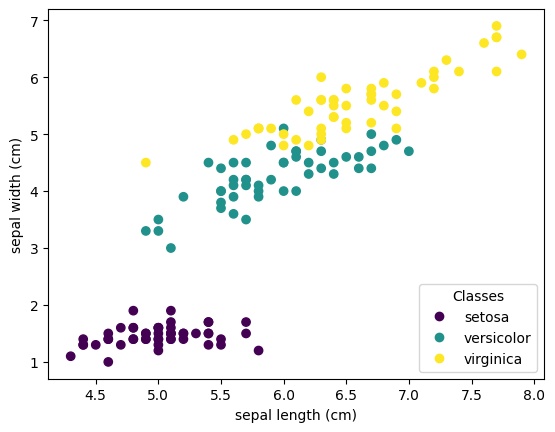

In [10]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

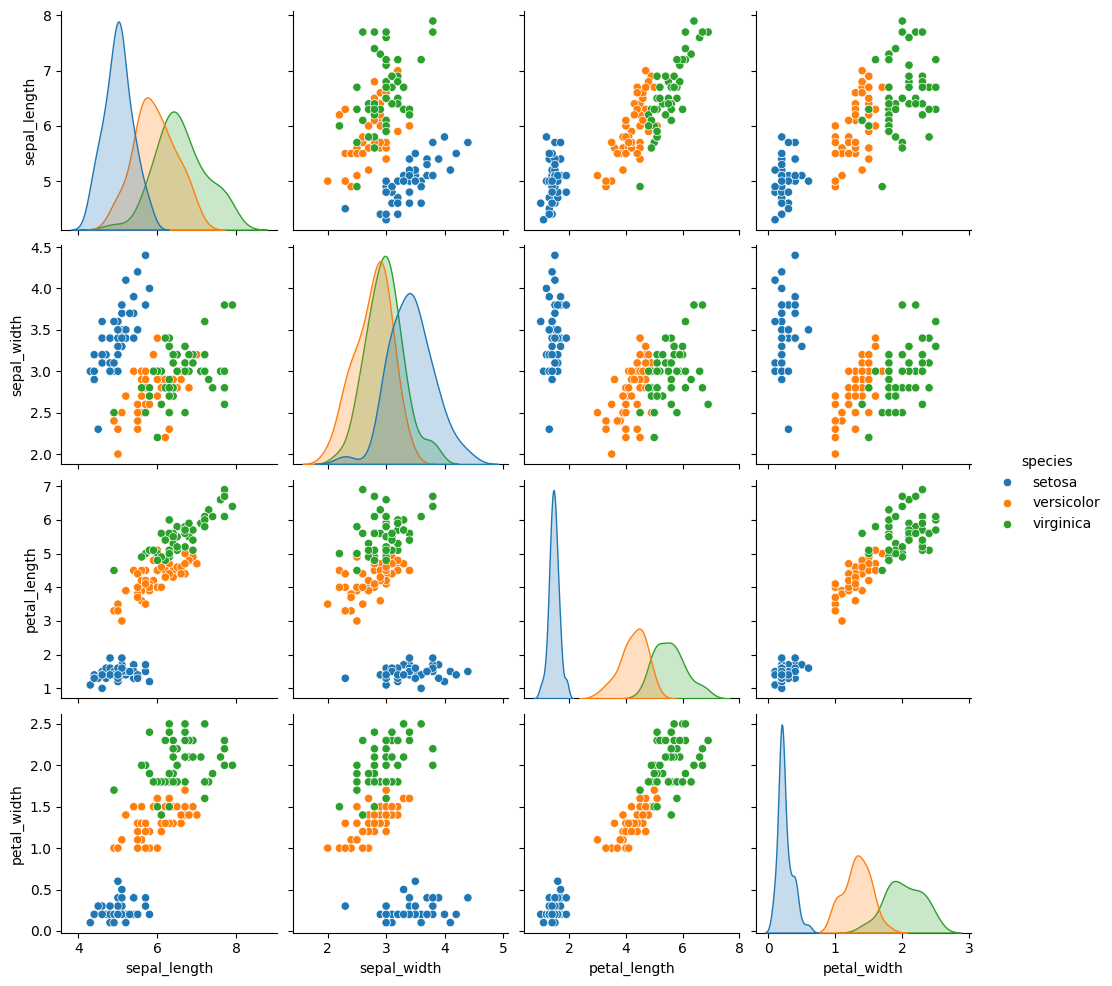

In [11]:
sns.pairplot(df , hue="species")

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


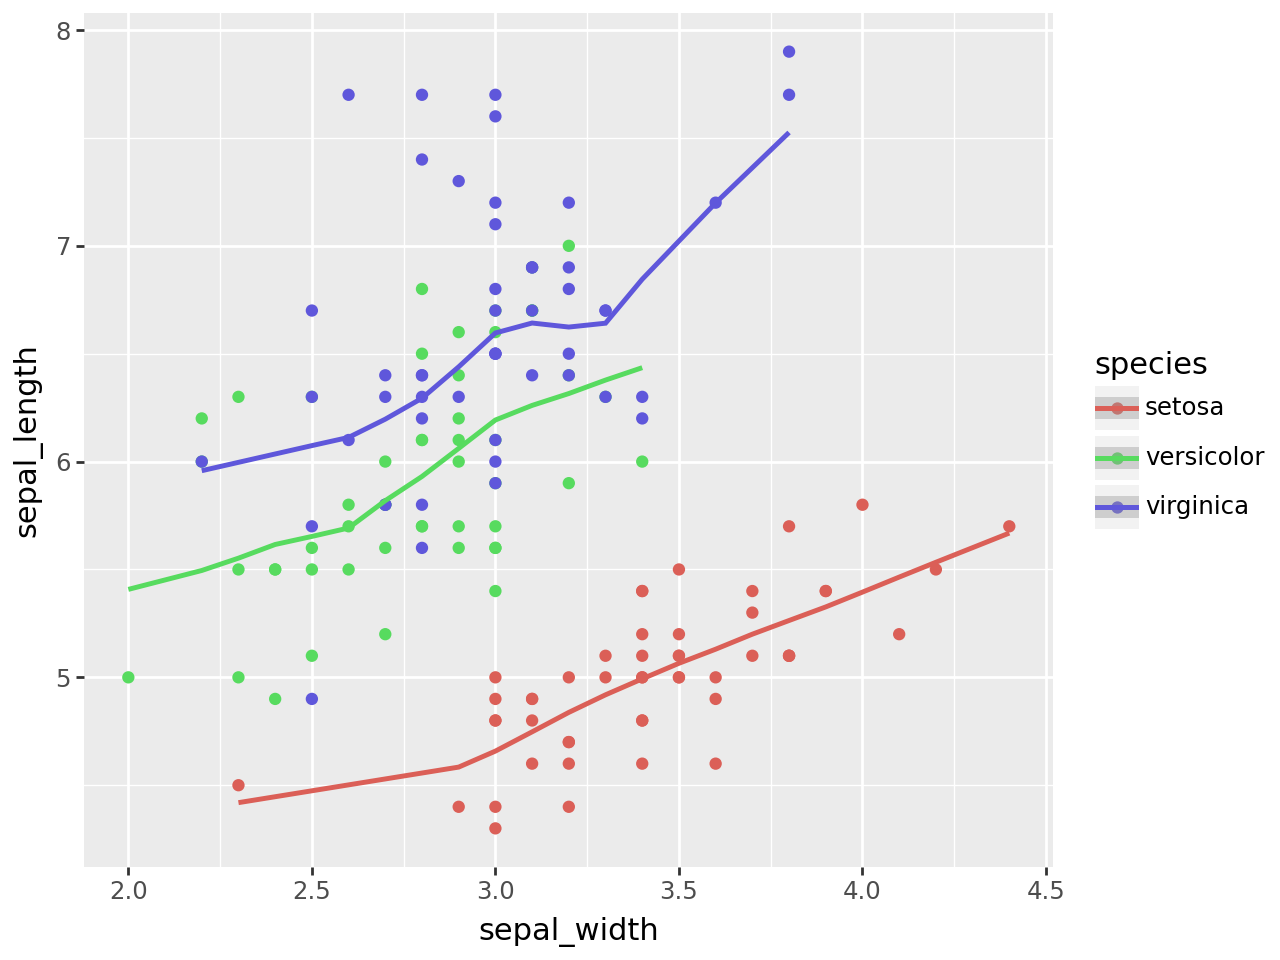

In [12]:
plot = ggplot(df, aes(x='sepal_width', y='sepal_length', color='species')) + \
       geom_point() + \
       geom_smooth()

# Menampilkan plot
plot.show()

In [13]:
X = iris.data

In [14]:
dist_matrix = pdist(X)

In [15]:
hc = linkage(dist_matrix)

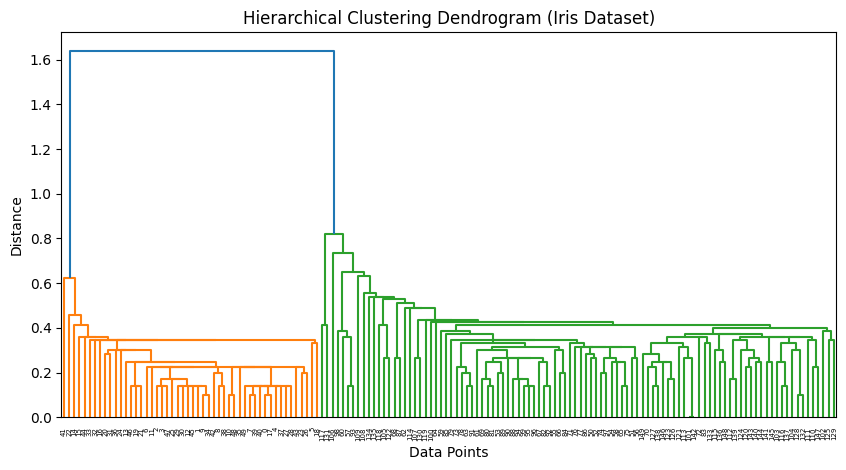

In [16]:
plt.figure(figsize=(10, 5))
dendrogram(hc)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()